# Part 1: Array-oriented programming

## What is "array-oriented programming"?

In [1]:
import numpy as np

## What is array-oriented programming good for?

### The grandfather: APL

In [2]:
%%html
<div style="overflow: hidden;"><iframe src="https://tryapl.org/" width="100%" height="600" scrolling="no" style="border: none;"></div>

**Quizlet:** Translate the following NumPy operations into APL.

<br>

In [3]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.sum(np.arange(10))

45

In [5]:
np.cumsum(np.arange(10))

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [6]:
%%html
<!-- This will only work on the day of the live tutorial. -->
<div style="overflow: hidden;"><iframe src="https://app.sli.do/event/rbr8JR3hY4WEZ9CpWm94Xg/embed/polls/d92f941a-23fc-494d-a18b-8163205dc779" width="100%" height="280" scrolling="no" style="border: none;"></div>

### Distributions and interactivity

In [7]:
from hist import Hist  # histogram library

In [8]:
dataset = np.random.normal(0, 1, 1000000)  # one MILLION data points

In [9]:
Hist.new.Reg(100, -5, 5).Double().fill(dataset)

Hist(Regular(100, -5, 5, label='Axis 0'), storage=Double()) # Sum: 1000000.0

In [10]:
dataset2 = dataset**2

In [11]:
Hist.new.Reg(100, -1, 10).Double().fill(dataset2)

Hist(Regular(100, -1, 10, label='Axis 0'), storage=Double()) # Sum: 998487.0 (1000000.0 with flow)

In [12]:
dataset3 = np.sin(1/dataset2)

In [13]:
Hist.new.Reg(100, -1, 1).Double().fill(dataset3)

Hist(Regular(100, -1, 1, label='Axis 0'), storage=Double()) # Sum: 1000000.0

## NumPy

<img src="../img/Numpy_Python_Cheat_Sheet.svg" width="100%">

In [14]:
def quadratic_formula(a, b, c):
    return (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)

In [15]:
a = np.random.uniform(5, 10, 1000000)
b = np.random.uniform(10, 20, 1000000)
c = np.random.uniform(-0.1, 0.1, 1000000)

### A note about performance

In [16]:
def pedantic_quadratic_formula(a, b, c):
    tmp1 = np.negative(b)            # -b
    tmp2 = np.square(b)              # b**2
    tmp3 = np.multiply(4, a)         # 4*a
    tmp4 = np.multiply(tmp3, c)      # tmp3*c
    del tmp3
    tmp5 = np.subtract(tmp2, tmp4)   # tmp2 - tmp4
    del tmp2, tmp4
    tmp6 = np.sqrt(tmp5)             # sqrt(tmp5)
    del tmp5
    tmp7 = np.add(tmp1, tmp6)        # tmp1 + tmp6
    del tmp1, tmp6
    tmp8 = np.multiply(2, a)         # 2*a
    return np.divide(tmp7, tmp8)     # tmp7 / tmp8

In [17]:
%%timeit

imperative = np.empty_like(c)
for i, (ai, bi, ci) in enumerate(zip(a, b, c)):
    imperative[i] = quadratic_formula(ai, bi, ci)

1.05 s ± 22.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit

quadratic_formula(a, b, c)

14.5 ms ± 726 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit

pedantic_quadratic_formula(a, b, c)

17.8 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
import numexpr as ne

ne.evaluate("(-b + sqrt(b**2 - 4*a*c)) / (2*a)");

In [21]:
import numba as nb

@nb.vectorize
def numba_quadratic_formula(a, b, c):
    return (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)

numba_quadratic_formula(a, b, c);

In [22]:
import jax
jax.config.update("jax_platform_name", "cpu"); jax.config.update("jax_enable_x64", True)

@jax.jit
def jax_quadratic_formula(a, b, c):
    return (-b + jax.numpy.sqrt(b**2 - 4*a*c)) / (2*a)

jax_quadratic_formula(a, b, c);

In [23]:
%%timeit
quadratic_formula(a, b, c)         # NumPy (loop over data for each operation... mostly)

28 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%timeit
ne.re_evaluate()                   # NumExpr (fast virtual machine)

2.37 ms ± 56.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%%timeit
numba_quadratic_formula(a, b, c)   # Numba (compiles with LLVM)

3.66 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit
jax_quadratic_formula(a, b, c)     # JAX (compiles with XLA)

1.94 ms ± 469 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Expressibility in NumPy

**Quizlet:** Compute the length of the curve sampled by arrays `x` and `y`.

In [27]:
t = np.linspace(0, 2*np.pi, 10000)
x = np.sin(3*t)
y = np.sin(4*t)

<br>

<center>
<img src="../img/length-by-segment.svg" width="40%">
</center>

In [28]:
import matplotlib.pyplot as plt

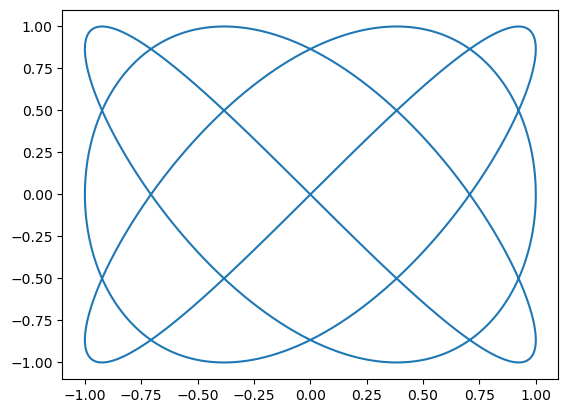

In [29]:
plt.plot(x, y);

In [30]:
%%html
<!-- This will only work on the day of the live tutorial. -->
<div style="overflow: hidden;"><iframe src="https://app.sli.do/event/rbr8JR3hY4WEZ9CpWm94Xg/embed/polls/d92f941a-23fc-494d-a18b-8163205dc779" width="100%" height="280" scrolling="no" style="border: none;"></div>

**Quizlet:** Downsample this curve to make it less noisy.

In [31]:
noisy_data = np.sin(np.linspace(0, 2*np.pi, 1000)) + np.random.normal(0, 0.5, 1000)

<br>

That is, replace every 10 consecutive array elements with their average value, reducing the number of array elements from 1000 to 100, but representing the same curve (ranging from ‒1 to 1).

Note: this is how `axis` works for reducers.

<center>
<img src="../img/example-reducer-2d.svg" width="40%">
</center>

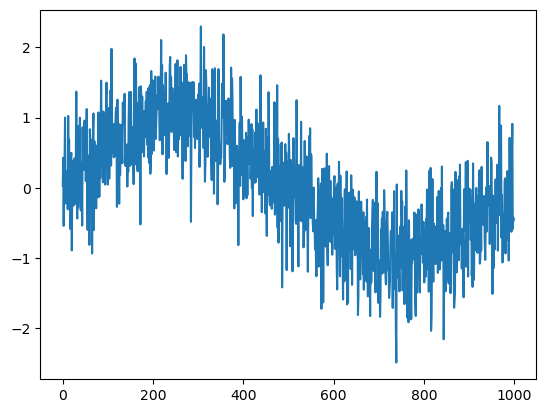

In [32]:
plt.plot(noisy_data);

In [33]:
%%html
<!-- This will only work on the day of the live tutorial. -->
<div style="overflow: hidden;"><iframe src="https://app.sli.do/event/rbr8JR3hY4WEZ9CpWm94Xg/embed/polls/d92f941a-23fc-494d-a18b-8163205dc779" width="100%" height="280" scrolling="no" style="border: none;"></div>

**Go to the [Part 1 exercise](exercise.ipynb) now!**